<font size="+5" color="orange">**Entrega N°6**</font>

<font size="+4" color="lightgreen">**Price House DataSet**</font>

<font size="+2" color="lightgreen">
Los mercados inmobiliarios presentan una oportunidad interesante para analizar y predecir hacia dónde se dirigen los precios de las propiedades.
Para este propósito, se utiliza un conjunto de datos que contiene información sobre diferentes características de las viviendas, como el número de habitaciones (bedrooms), el tamaño del lote (sqft_lot), y más.
En este caso, se busca utilizar machine learning para entrenar y evaluar al modelo y poder predecir el precio de viviendas en base a un conjunto de datos que se puede encontrar en Kaggle, en el siguiente link: https://www.kaggle.com/datasets/shree1992/housedata.
Una vez que se ha entrenado y evaluado el modelo, se puede utilizar para realizar predicciones de precios de viviendas en datos no vistos. Esto es especialmente útil para tasadores, agentes inmobiliarios y compradores interesados en estimar el precio de una vivienda en función de sus características.
<br>
<br>
OBJETIVO: <br> <br>
El objetivo es utilizar el análisis de datos para tomar decisiones más informadas y estratégicas en la fijación de precios, lo que beneficiará tanto a los vendedores como a los compradores en el mercado inmobiliario.
<br> <br>
Contexto comercial <br> <br>
La industria inmobiliaria se encuentra en el sector de bienes raíces, que involucra la compra, venta y alquiler de propiedades residenciales y comerciales.
Podre brindarle a nuestros clientes (comprador o vendedor) un estimativo del precio de venta de la propiedad que depende de las diferentes características que tenga para que de esta manera podamos tener el precio de venta estimado sin ver la propiedad y poder brindarles una respuesta muy rápida.
<br> <br>
Problema comercial<br> <br>
Determinar el precio óptimo de una vivienda es esencial para los vendedores y compradores. Los vendedores desean maximizar sus ganancias, mientras que los compradores buscan obtener una propiedad a un precio justo. Un análisis de datos puede ayudar a encontrar el equilibrio adecuado, teniendo en cuenta las características debajo descriptas, lo que resulta en un precio competitivo y justo.
<br> <br>
Contexto analítico <br> <br>
Para poder desarrollar el modelo se cuenta con un conjunto de 4600 viviendas del Estado de Washington USA.
<br> <br>
Las variables disponibles (18) son las siguientes: <br>
date = fecha Mayo a Julio de 2014 <br>
price = precio <br>
bedrooms = dormitorios <br>
bathrooms = baños <br>
sqft_living = metraje area construida <br>
sqft_lot = metraje tamaño del terreno <br>
floors = cantidad de pisos teniendo los siguientes valores (1.0 , 1.5 , 2.0 , 2.5 , 3.0 , 3.5) <br>
waterfront = propiedad en la línea costera / siendo 1 el valor más alto y 0 el valor mínimo <br>
view = vista de la propiedad teniendo los siguientes valores (1 , 2 , 3 , 4) <br>
condition = condición de la propiedad / siendo 5 el valor más alto y 1 el valor mínimo <br>
sqft_above = metraje del ático <br>
sqft_basement = metraje del sótano <br>
yr_built = año de construcción <br>
yr_renovated = en que año fue renovada <br>
street = dirección <br>
city = ciudad <br>
statezip = código postal de la ciudad <br>
country = País (siendo el valor único USA) <br>
<br> <br>
En resumen, el objetivo final es construir un modelo preciso que pueda hacer predicciones útiles sobre el precio de las viviendas en función de sus características, lo que puede tener aplicaciones prácticas en el mercado inmobiliario y la toma de decisiones financiera.

In [ ]:
# Importo las librerías y las renombro
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
# Libreria para estimar regresión
import statsmodels.formula.api as sm

from sklearn.preprocessing import StandardScaler

In [4]:
# Levanto data
url = 'https://raw.githubusercontent.com/NicholasSprigings/DataScience_Sprigings_Entrega6/main/data.csv'
df = pd.read_csv(url, sep = ',')

<font size="+2" color="orange">**Variable Target: price**</font>
<br><br>
La variable objetivo es de tipo numérica, por lo que el modelo a desarrollar será de tipo Aprendizaje Supervisado: Regresión.


In [6]:
# verifico los valores en cero en la variable target price para el df original
df[df['price']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [7]:
df = df[df['price'] > 100]

In [8]:
variable_target = df['price']

In [9]:
# Metodo IQR
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites:
limite_inf = primer_cuartil - (1 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1 * rango_intercuartilico)

print(limite_inf,limite_sup,rango_intercuartilico)

-4971.428570999997 988735.7142855 331235.7142855


In [10]:
# Identifico outliers:
df['Outlier_IQR'] = np.where((df['price'] < limite_inf) | (df['price'] > limite_sup),1,0)
df['Outlier_IQR'].value_counts()

0    4198
1     353
Name: Outlier_IQR, dtype: int64

In [11]:
# Creo mi DF sin Outliers
df_sin_outliers = df[df['Outlier_IQR']==0]

In [15]:
# Agrego la columna de índice como una columna llamada "Index" al DataFrame
df_sin_outliers['Index'] = df_sin_outliers.index

<ipython-input-15-29866119a9f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['Index'] = df_sin_outliers.index


<font size="+2" color="orange">**Exploro mis datos**</font>

In [17]:
df_sin_outliers.shape

(4198, 20)

In [18]:
df_sin_outliers.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,2
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,0,4
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,0,5


In [19]:
print(df_sin_outliers.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Outlier_IQR', 'Index'],
      dtype='object')


In [20]:
print(df_sin_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4198 non-null   object 
 1   price          4198 non-null   float64
 2   bedrooms       4198 non-null   float64
 3   bathrooms      4198 non-null   float64
 4   sqft_living    4198 non-null   int64  
 5   sqft_lot       4198 non-null   int64  
 6   floors         4198 non-null   float64
 7   waterfront     4198 non-null   int64  
 8   view           4198 non-null   int64  
 9   condition      4198 non-null   int64  
 10  sqft_above     4198 non-null   int64  
 11  sqft_basement  4198 non-null   int64  
 12  yr_built       4198 non-null   int64  
 13  yr_renovated   4198 non-null   int64  
 14  street         4198 non-null   object 
 15  city           4198 non-null   object 
 16  statezip       4198 non-null   object 
 17  country        4198 non-null   object 
 18  Outlier_

In [21]:
print(df_sin_outliers.describe())

               price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count    4198.000000  4198.000000  4198.000000  4198.000000  4.198000e+03   
mean   471901.475729     3.337542     2.071641  1994.385422  1.427446e+04   
std    196120.579962     0.875187     0.696457   772.079919  3.570649e+04   
min      7800.000000     1.000000     0.750000   370.000000  6.380000e+02   
25%    315000.000000     3.000000     1.750000  1420.000000  5.000000e+03   
50%    441375.000000     3.000000     2.250000  1900.000000  7.521500e+03   
75%    600000.000000     4.000000     2.500000  2460.000000  1.049575e+04   
max    988500.000000     9.000000     5.750000  5960.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4198.000000  4198.000000  4198.000000  4198.000000  4198.000000   
mean      1.487851     0.003335     0.158647     3.442354  1716.158885   
std       0.537243     0.057659     0.613241     0.667777   728.663967   
min       

<font size="+2" color="orange">**Estudio de Variable Target: price**</font>
<br><br>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable.

In [22]:
variable_target = df_sin_outliers['price']
variable_target.info()

<class 'pandas.core.series.Series'>
Int64Index: 4198 entries, 0 to 4599
Series name: price
Non-Null Count  Dtype  
--------------  -----  
4198 non-null   float64
dtypes: float64(1)
memory usage: 65.6 KB


In [23]:
variable_target = df_sin_outliers['price']
variable_target.describe().round(0)

count      4198.0
mean     471901.0
std      196121.0
min        7800.0
25%      315000.0
50%      441375.0
75%      600000.0
max      988500.0
Name: price, dtype: float64

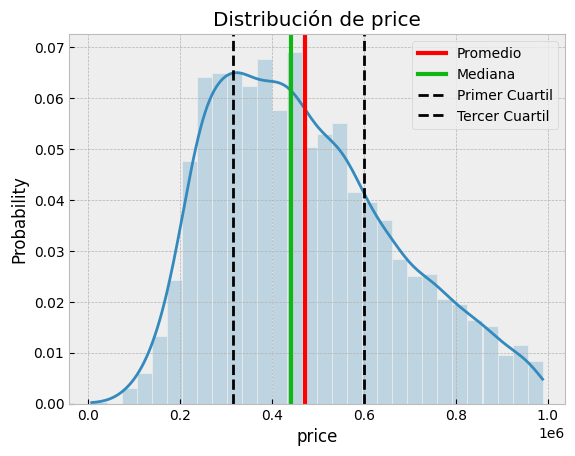

In [26]:
# Calculo algunas medidas que voy a utilizar
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Histograma variable target: price
plt.figure()
sns.histplot(data = df_sin_outliers,
             x = 'price',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.title('Distribución de price')
plt.show()

Interpretación: Podemos observar que la variable tiene una distribución sesgada hacia la derecha y al ser la mediana menor que el promedio confirma esta distribución con una tendencia hacia valores más altos lo que nos indica la presencia de valores atípicos en el extremo derecho lo que podría estar influyendo en esta asimetría.

Utilizare la tecnica de <font size="+2" color="orange">**Filter Feature Selection**</font> y lo que hare es calcular el Coeficiente de Correlación de cada una de las variables (features) con respecto a mi Variable Target: price
<br> <br/>
Este analisis es realizado para ver cuáles son las variables numéricas más relacionadas con la variable target y luego las ordenare de mayor a menor los valores hayados
<br> <br/>
Antes debo transformar mis variables categoricas en numéricas utilizando el método One-Hot Encoding creando una columna binaria para cada categoría en la variable original.

In [27]:
features_categoricas = df_sin_outliers.select_dtypes(include=['object'])
features_categoricas.columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [28]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

street      4129
statezip      77
date          70
city          44
country        1
dtype: int64


Decido no transformar ninguna de las variables categoricas ya que las mismas contienen muchas columnas

In [29]:
# Matriz de correlacion
df_sin_outliers[['price','bedrooms','bathrooms','sqft_living','sqft_lot','waterfront',
    'view','condition','yr_built']].corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,yr_built
price,1.000000,0.301862,0.455378,0.604442,0.083595,0.066158,0.193128,0.046251,0.052817
bedrooms,0.301862,1.000000,0.515591,0.603758,0.048381,-0.031756,0.061352,0.016791,0.154254
bathrooms,0.455378,0.515591,1.000000,0.713504,0.068801,0.007399,0.108109,-0.144107,0.523759
sqft_living,0.604442,0.603758,0.713504,1.000000,0.177023,0.019121,0.180998,-0.085155,0.331539
sqft_lot,0.083595,0.048381,0.068801,0.177023,1.000000,0.023222,0.085407,0.005398,0.035316
waterfront,0.066158,-0.031756,0.007399,0.019121,0.023222,1.000000,0.315218,0.029747,-0.038024
view,0.193128,0.061352,0.108109,0.180998,0.085407,0.315218,1.000000,0.040957,-0.064919
condition,0.046251,0.016791,-0.144107,-0.085155,0.005398,0.029747,0.040957,1.000000,-0.393141
yr_built,0.052817,0.154254,0.523759,0.331539,0.035316,-0.038024,-0.064919,-0.393141,1.000000


In [30]:
# Calculo matriz de correlación
matriz_correlacion = df_sin_outliers.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['price']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ['price', 'Outlier_IQR']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

<ipython-input-30-4a18e41e0708>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_sin_outliers.corr(method='pearson')


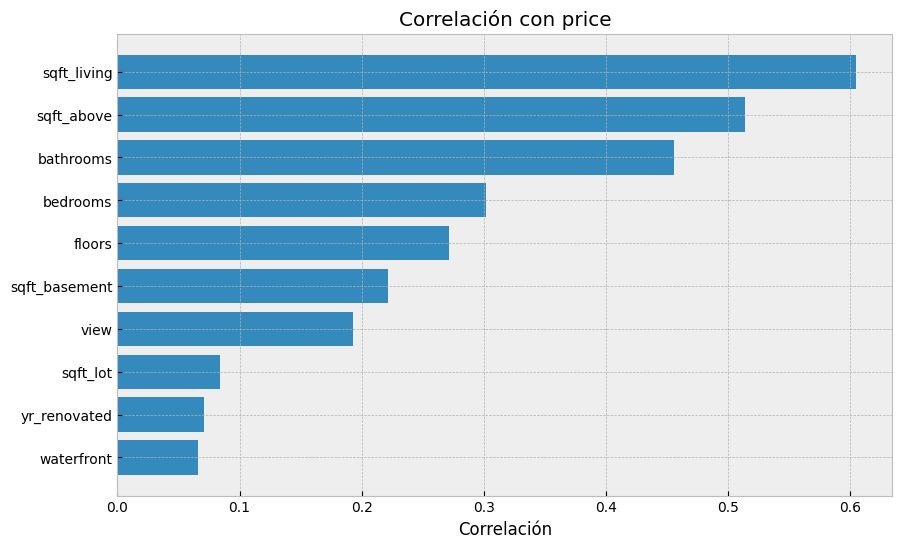

In [31]:
# Grafico el top 10 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values)
plt.xlabel('Correlación')
plt.title('Correlación con price')
plt.gca().invert_yaxis()
plt.show()

<font size="+2" color="orange">**Estudio univariado y bivariado de variables con más correlación**</font>

<font size="+2" color="orange">**sqft_living**</font>
<br>
Esta variable mide el área construida, es una variable NUMERICA

**sqft_living: Gráfico Univariado**

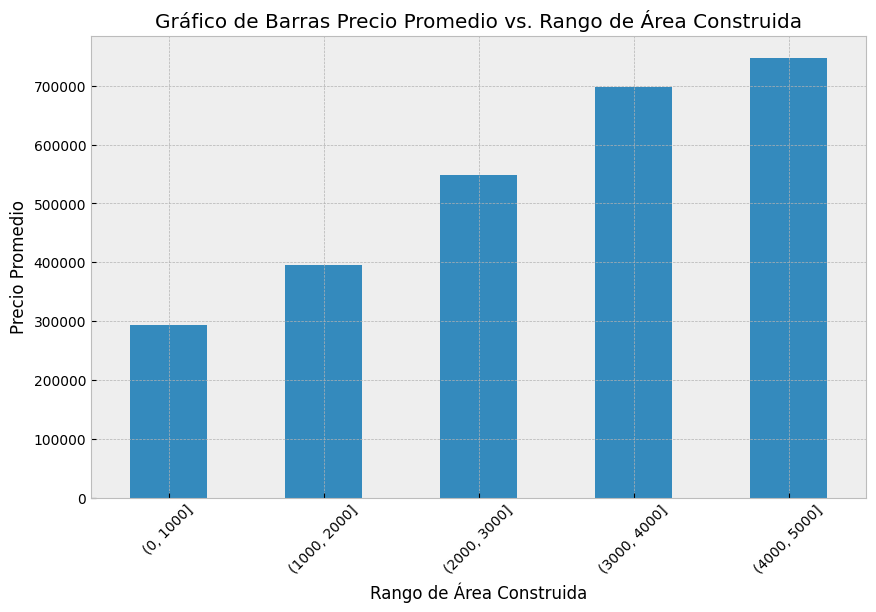

In [32]:
intervalos = [0, 1000, 2000, 3000, 4000, 5000]
precio_promedio = df_sin_outliers.groupby(pd.cut(df_sin_outliers['sqft_living'], intervalos))['price'].mean()

plt.figure(figsize=(10, 6))
precio_promedio.plot(kind='bar')
plt.xlabel('Rango de Área Construida')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Barras Precio Promedio vs. Rango de Área Construida')
plt.xticks(rotation=45)
plt.show()

Interpretación: El precio tiende a aumentar a medida que el tamaño del área construida crece. Esto nos indica que las propiedades más grandes son más caras y que la tendencia es positiva

**sqft_living: Gráfico Bivariado**

Promedio de Área Construida: 1994.3854216293473
Moda de Área Construida: 1720
Mediana de Área Construida: 1900.0


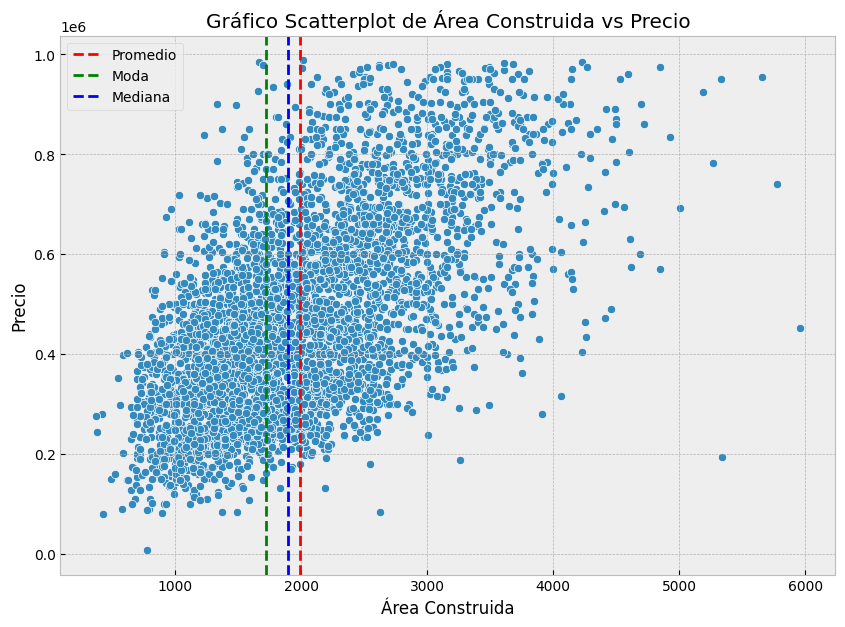

In [33]:
# Gráfico Scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=df_sin_outliers)
plt.xlabel('Área Construida')
plt.ylabel('Precio')
plt.title('Gráfico Scatterplot de Área Construida vs Precio')

average_sqft_living = df_sin_outliers['sqft_living'].mean()
mode_sqft_living = df_sin_outliers['sqft_living'].mode()[0]
median_sqft_living = df_sin_outliers['sqft_living'].median()
print(f"Promedio de Área Construida: {average_sqft_living}")
print(f"Moda de Área Construida: {mode_sqft_living}")
print(f"Mediana de Área Construida: {median_sqft_living}")

plt.axvline(average_sqft_living, color='red', linestyle='--', label='Promedio')
plt.axvline(mode_sqft_living, color='green', linestyle='--', label='Moda')
plt.axvline(median_sqft_living, color='blue', linestyle='--', label='Mediana')
plt.legend()
plt.show()

Interpretación: El gráfico nos proporciona una representación visual de la relación entre el precio y el área construida. La moda sugiere cuál es el tamaño de área construida más común, la mediana indica el punto medio y el promedio muestra la tendencia general en términos de tamaño de área construida.

<font size="+2" color="orange">**sqft_above**</font>
<br>
Esta variable mide el metraje del ático, es una variable NUMERICA

**sqft_above: Gráfico Univariado**

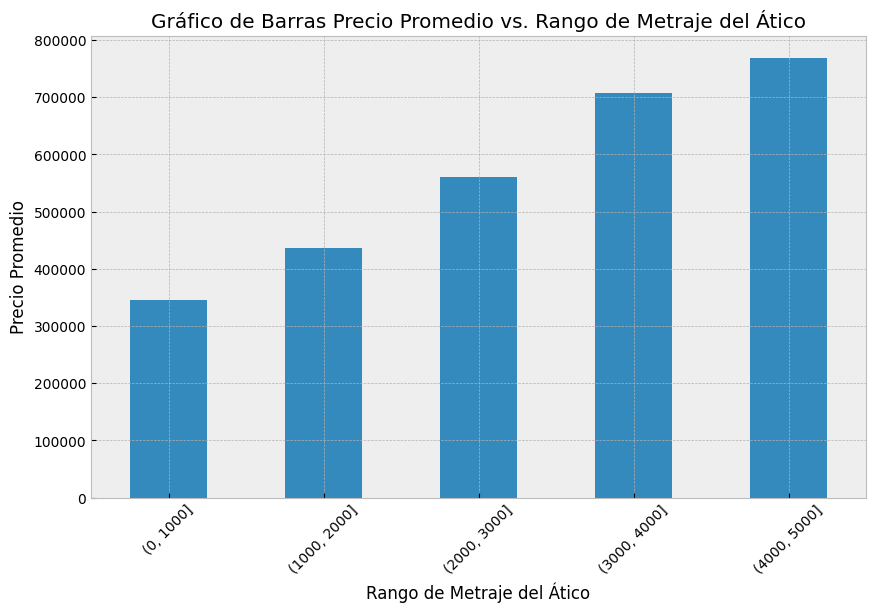

In [34]:
intervalos = [0, 1000, 2000, 3000, 4000, 5000]
precio_promedio = df_sin_outliers.groupby(pd.cut(df_sin_outliers['sqft_above'], intervalos))['price'].mean()

plt.figure(figsize=(10, 6))
precio_promedio.plot(kind='bar')
plt.xlabel('Rango de Metraje del Ático')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Barras Precio Promedio vs. Rango de Metraje del Ático')
plt.xticks(rotation=45)
plt.show()

Interpretación: El precio tiende a aumentar a medida que el tamaño del metraje del ático crece. Esto nos indica que las propiedades más grandes son más caras y que la tendencia es positiva.

**sqft_above: Gráfico Bivariado**

Promedio de Metraje del Ático: 1716.1588851834206
Moda de Metraje del Ático: 1010
Mediana de Metraje del Ático: 1520.0


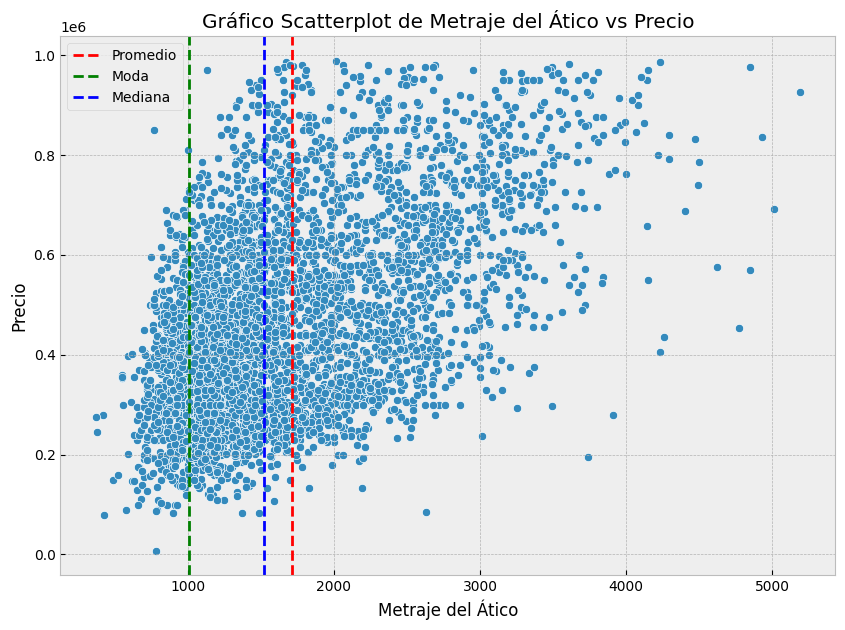

In [35]:
# Gráfico Scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_above', y='price', data=df_sin_outliers)
plt.xlabel('Metraje del Ático')
plt.ylabel('Precio')
plt.title('Gráfico Scatterplot de Metraje del Ático vs Precio')

average_sqft_above = df_sin_outliers['sqft_above'].mean()
mode_sqft_above = df_sin_outliers['sqft_above'].mode()[0]
median_sqft_above = df_sin_outliers['sqft_above'].median()
print(f"Promedio de Metraje del Ático: {average_sqft_above}")
print(f"Moda de Metraje del Ático: {mode_sqft_above}")
print(f"Mediana de Metraje del Ático: {median_sqft_above}")

plt.axvline(average_sqft_above, color='red', linestyle='--', label='Promedio')
plt.axvline(mode_sqft_above, color='green', linestyle='--', label='Moda')
plt.axvline(median_sqft_above, color='blue', linestyle='--', label='Mediana')
plt.legend()
plt.show()

Interpretación: El gráfico nos proporciona una representación visual de la relación entre el precio y el tamaño del ático. La moda sugiere cuál es el tamaño del ático más común, la mediana indica el punto medio y el promedio muestra la tendencia general en términos de tamaño del ático.